# Analisys and Statistics
In this section, we need to analyze the data better with the help of statistical methods

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#-------------------
import scipy.stats as stats
import statistics


In [2]:
# read data and create DataFram
path = "D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe"
dir_list = os.listdir(path)
variable_names = dir_list.copy()
for i in range(len(variable_names)):
    variable_names[i] = variable_names[i].replace(".csv","")

file_names = dir_list

for var_name, file_name in zip(variable_names, file_names):
    print(f"name {var_name}    and file {var_name}")
    globals()[var_name] = pd.read_csv(f'D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe/{file_name}').drop("Unnamed: 0", axis=1)


name album    and file album
name artist    and file artist
name customer    and file customer
name employee    and file employee
name genre    and file genre
name invoice    and file invoice
name invoiceline    and file invoiceline
name mediatype    and file mediatype
name playlist    and file playlist
name playlisttrack    and file playlisttrack
name track    and file track


1. Normality of numerical variables

count    347.000000
mean      10.095101
std        7.011110
min        1.000000
25%        2.000000
50%       11.000000
75%       14.000000
max       57.000000
Name: total_track, dtype: float64


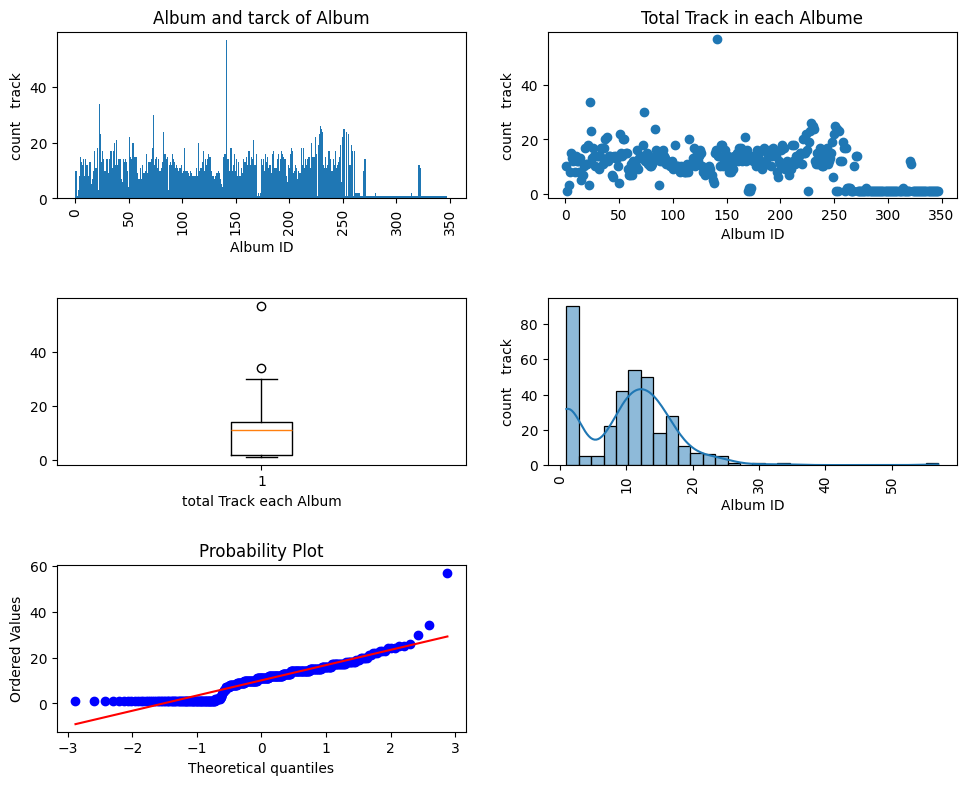

In [7]:
album_track = (track[['AlbumId','TrackId']].groupby('AlbumId')
               .count().reset_index()
               .rename(columns={'TrackId':"total_track"}))

print(album_track['total_track'].describe())

plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)
plt.subplot(3,2,1)
plt.bar(album_track['AlbumId'], album_track['total_track'],1)
plt.title('Album and tarck of Album')
plt.xlabel('Album ID')
plt.xticks(rotation=90)
plt.ylabel('count   track')
#-------------
plt.subplot(3,2,2)
plt.scatter(album_track['AlbumId'],album_track['total_track'])
plt.title('Total Track in each Albume')
plt.xlabel('Album ID')
plt.ylabel('count   track')

#-------------
plt.subplot(3,2,3)
plt.boxplot(album_track['total_track'])
plt.xlabel('total Track each Album')

#-------------
plt.subplot(3,2,4)
sns.histplot(album_track['total_track'],bins=30, kde=True)
plt.xlabel('Album ID')
plt.xticks(rotation=90)
plt.ylabel('count   track')

#--------------
plt.subplot(3,2,5)
stats.probplot(album_track['total_track'], dist='norm', plot=plt)
plt.show()

## Checking the normal distribution
According to the above graphs, it is clear that the data is not normal, but we want to check this issue with different tests

In [8]:
# shapiro test
sw_stat, sw_p_value = stats.shapiro(album_track['total_track'])
print(f'Shapiro-Wilk test: statistic={sw_stat}, p-value={sw_p_value}')
alpha = 0.05
if sw_p_value < alpha:
    print(f'shapiro test: data is Normad')
else:
    print(f'shapiro test: data is unNormad')


Shapiro-Wilk test: statistic=0.8880886807416963, p-value=3.0437154396080396e-15
shapiro test: data is Normad


## Delete the data worshiper
1. Each album contains at least 2 tracks, so single-track albums should be deleted

2. According to the graphs, there are outliers, For example, an album contains 57 tracks

count    245.000000
mean      12.518367
std        3.687133
min        3.000000
25%       10.000000
50%       12.000000
75%       15.000000
max       22.000000
Name: total_track, dtype: float64


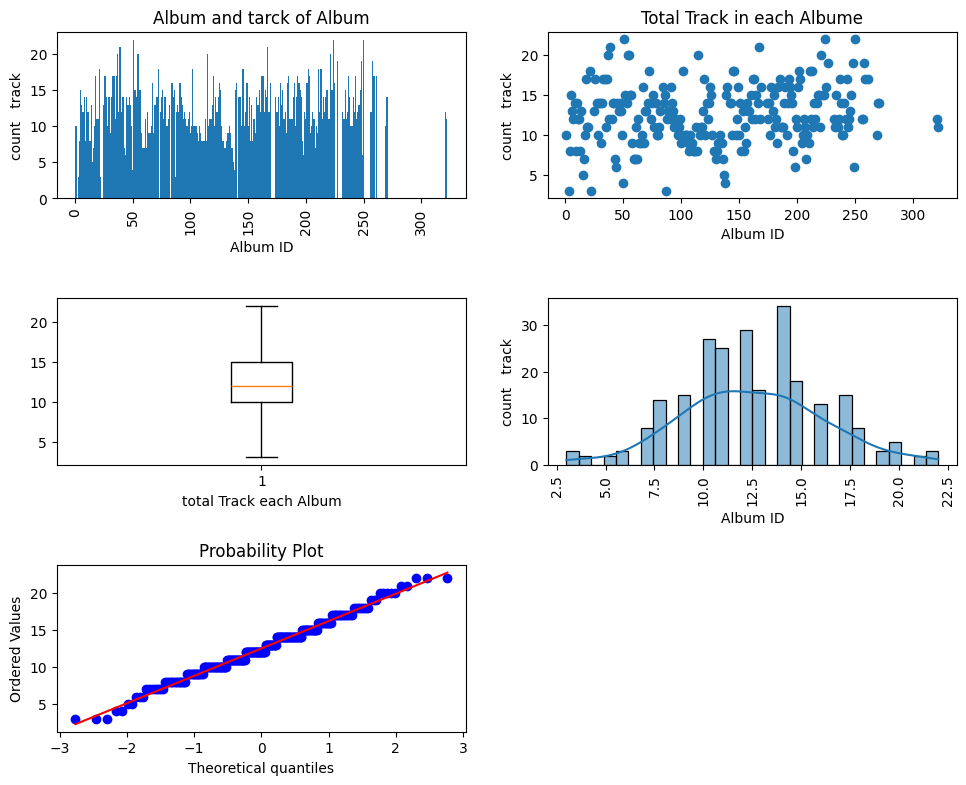

In [9]:
# 1st step: remove alboum with 1 track
album_track_clean = album_track.copy()
album_track_clean = album_track_clean[album_track_clean['total_track'].ne(1)].sort_values(['total_track'])

# 2nd step : delet outliers
Q1 = np.quantile(album_track_clean['total_track'], 0.25)
Q2 = np.quantile(album_track_clean['total_track'], 0.50)
Q3 = np.quantile(album_track_clean['total_track'], 0.75)
IQR = Q3-Q1

album_track_clean = (album_track_clean[(album_track_clean['total_track'] > (Q1 - 1.5*IQR)) &
                                       (album_track_clean['total_track'] < (Q3 + 1.5*IQR))])

print(album_track_clean['total_track'].describe())

plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)
plt.subplot(3,2,1)
plt.bar(album_track_clean['AlbumId'], album_track_clean['total_track'],1)
plt.title('Album and tarck of Album')
plt.xlabel('Album ID')
plt.xticks(rotation=90)
plt.ylabel('count   track')
#-------------
plt.subplot(3,2,2)
plt.scatter(album_track_clean['AlbumId'],album_track_clean['total_track'])
plt.title('Total Track in each Albume')
plt.xlabel('Album ID')
plt.ylabel('count   track')

#-------------
plt.subplot(3,2,3)
plt.boxplot(album_track_clean['total_track'])
plt.xlabel('total Track each Album')

#-------------
plt.subplot(3,2,4)
sns.histplot(album_track_clean['total_track'],bins=30, kde=True)
plt.xlabel('Album ID')
plt.xticks(rotation=90)
plt.ylabel('count   track')
#------------------
plt.subplot(3,2,5)
stats.probplot(album_track_clean['total_track'], dist='norm', plot=plt)
plt.show()
plt.show()

In [10]:

# shapiro test
staticts, sw_p_value = stats.shapiro(album_track_clean['total_track'])
print(f'Shapiro-Wilk test: statistic={staticts}, p-value={sw_p_value}')
alpha = 0.05
if sw_p_value < alpha:
    print(f'shapiro test: data is Normad')
else:
    print(f'shapiro test: data is unNormad')


Shapiro-Wilk test: statistic=0.988594701867193, p-value=0.04967020894838745
shapiro test: data is Normad


2. album and total price

In [34]:
album_price = pd.merge(invoiceline, track[['TrackId', 'AlbumId']],
                              left_on='TrackId', right_on='TrackId')
album_price['total_price']= album_total_price['UnitPrice'] * album_total_price['Quantity']
album_price[['AlbumId', 'total_price']].groupby('AlbumId').sum().reset_index()

,AlbumId,total_price
0,1,9.90
1,2,1.98
2,3,2.97
3,4,5.94
4,5,9.90
...,...,...
299,337,0.99
300,338,0.99
301,340,0.99
302,343,0.99


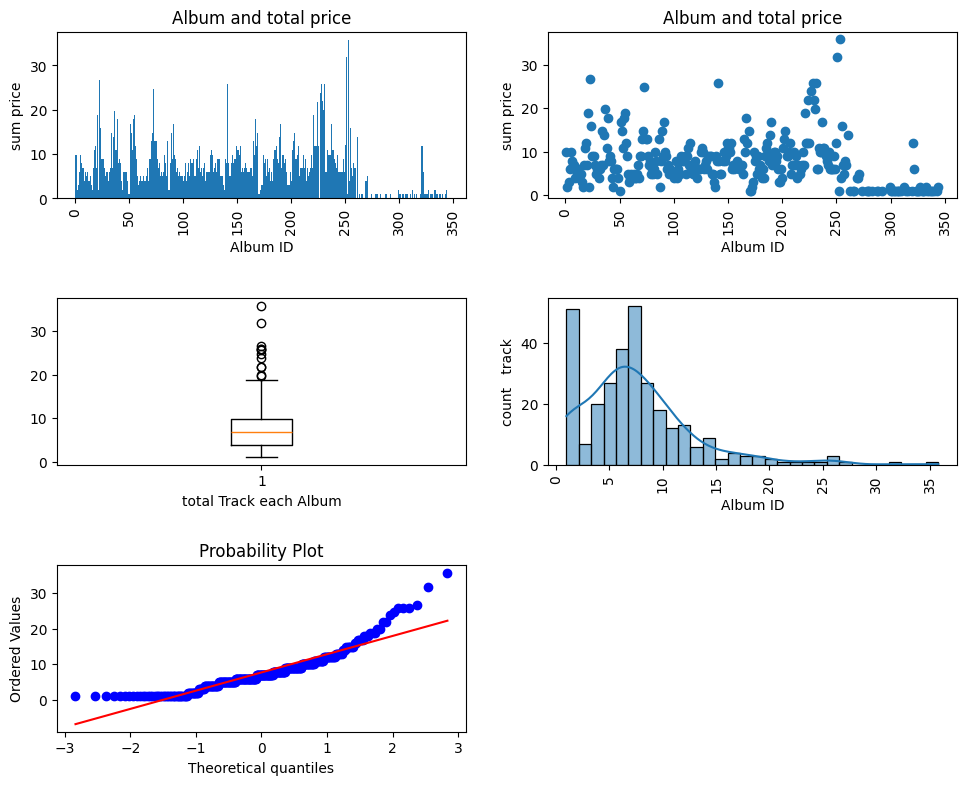

In [36]:
album_price = pd.merge(invoiceline, track[['TrackId', 'AlbumId']],
                              left_on='TrackId', right_on='TrackId')
album_price['total_price']= album_total_price['UnitPrice'] * album_total_price['Quantity']
album_tptal_price = album_price[['AlbumId', 'total_price']].groupby('AlbumId').sum().reset_index()

plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=1, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)
plt.subplot(3,2,1)
plt.bar(album_tptal_price['AlbumId'], album_tptal_price['total_price'],1)
plt.title('Album and total price')
plt.xlabel('Album ID')
plt.xticks(rotation=90)
plt.ylabel('sum price')
#-------------
plt.subplot(3,2,2)
plt.scatter(album_tptal_price['AlbumId'], album_tptal_price['total_price'])
plt.title('Album and total price')
plt.xlabel('Album ID')
plt.xticks(rotation=90)
plt.ylabel('sum price')
#-------------
plt.subplot(3,2,3)
plt.boxplot(album_tptal_price['total_price'])
plt.xlabel('total Track each Album')

#-------------
plt.subplot(3,2,4)
sns.histplot(album_tptal_price['total_price'],bins=30, kde=True)
plt.xlabel('Album ID')
plt.xticks(rotation=90)
plt.ylabel('count   track')
#------------------
plt.subplot(3,2,5)
stats.probplot(album_tptal_price['total_price'], dist='norm', plot=plt)
plt.show()
plt.show()